AG2-Actividad Guiada

Eduardo Cárdenas

https://colab.research.google.com/drive/1myohq_VhMbouSyyvdp8xWsrcP-ZojDLQ?usp=sharing

#Programación Dinámica

In [1]:
import itertools 

In [2]:
TARIFAS =  [
[0,5,4,3,999,999,999],
[999,0,999,2,3,999,11],
[999,999, 0,1,999,4,10],
[999,999,999, 0,5,6,9],
[999,999, 999,999,0,999,4],
[999,999, 999,999,999,0,3],
[999,999,999,999,999,999,0]
]

In [3]:
RUTA= [
['', 0, 0, 0, 1, 2, 5],
['', '', 1, 1, 1, 3, 4],
['', '', '', 2, 3, 2, 5],
['', '', '', '', 3, 3, 3],
['', '', '', '', '', 4, 4],
['', '', '', '', '', '', 5],
['', '', '', '', '', '', '']]

In [4]:
##EJercicio 1
def Precios(TARIFAS):
#########

  #Total de Nodos
  N= len(TARIFAS[0])

  #inicialización de la tabla de precios
  PRECIOS = [ [9999]*N for i in [9999]*N]
  RUTA = [ [""]*N for i in [""]*N]

  for i in range(N-1):
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i

      for k in range(i, j):
        if PRECIOS[i][k]+ TARIFAS[k][j] < MIN:
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] )
            RUTA[i][j] = k
        PRECIOS[i][j] = MIN

  return PRECIOS,RUTA

In [5]:
def calcular_ruta(RUTA, desde, hasta):
  if desde == hasta:
    #print("Ir a :" + str(desde))
    return desde
  else:
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta]) )+ ',' + str(RUTA[desde][hasta])

print("\nLa ruta es:")
calcular_ruta(RUTA, 0,6)


La ruta es:


'0,0,2,5'

#Ramificación y Poda

In [6]:
COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]

In [7]:
def valor(S,COSTES):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]
  return VALOR
  
valor((0 ,1, 2, 3),COSTES)

73

In [8]:
#import timeit
#timeit.timeit(''''')
def fuerza_bruta(COSTES):
  #Representación de la solución sería una tupla donde cada valor en la cordenada i-sima es la tarea asignado al agente 1
  #  Ejemplo (1,2,3,4) Tiene valor 11+15+19+28=73
  #
  #¿Cuantas posibilidades hay? n! -> Complejidad factorial(exponencial)
  #Con dimension 11 se va a 1 minuto de ejecución

  mejor_valor = 10e10
  mejor_solucion = ()
  
  
  for s in list(itertools.permutations(range(len(COSTES)))):
    #print(s,valor(s,COSTES))
    valor_tmp = valor(s,COSTES)
    if valor_tmp < mejor_valor:
      mejor_valor = valor_tmp
      mejor_solucion = s
  
  print("La mejor solucion es :", mejor_solucion, " con valor: ", mejor_valor  )

In [9]:
fuerza_bruta(COSTES)

La mejor solucion es : (0, 2, 3, 1)  con valor:  61


In [10]:
def CI(S,COSTES):
  VALOR = 0 
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimación
  for i in range(len(COSTES) ):
    if i not in S:
      VALOR += min( [ COSTES[j][i] for j in range(len(S), len(COSTES)) ])
  return VALOR

In [11]:
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N ):
    if i not in NODO:
      HIJOS.append({'s':NODO + (i,)  })
  return HIJOS

In [12]:
def ramificacion_y_poda(COSTES):
  DIMENSION = len(COSTES)
  MEJOR_SOLUCION= tuple( i for i in range(len(COSTES)) )
  CotaSup = valor(MEJOR_SOLUCION,COSTES)
  #print("Cota superior: ", CotaSup)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES) } )

  iteracion = 0

  while(len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [min(NODOS, key=lambda x:x['ci'])][0]['s']
    HIJOS = [{'s':x['s'],'ci':CI(x['s'],COSTES) } for x in crear_hijos(nodo_prometedor,DIMENSION) ]
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION ]
    if len(NODO_FINAL) >0:
      #print("\n*********Soluciones:", [x for x in HIJOS if len(x['s']) == DIMENSION ] )
      if NODO_FINAL[0]['ci']<CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL

    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup ]

    #Añadimos a los hijos
    NODOS.extend(HIJOS)

    #Eliminamos el nodo ramificado
    NODOS = [x for x in NODOS if x['s'] != nodo_prometedor  ]
  print("La solucion final es:" ,MEJOR_SOLUCION , "en " , iteracion ,"iteraciones" , "para dimension: ",DIMENSION )
  

In [13]:
ramificacion_y_poda(COSTES)

La solucion final es: [{'s': (0, 2, 3, 1), 'ci': 61}] en  14 iteraciones para dimension:  4


#Descenso del Gradiente

In [14]:
import math 
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import random

In [15]:
f  = lambda X:      X[0]**2+X[1]**2
df = lambda X: [2*X[0] , 2*X[1]]

Punto Inicial:  <function <lambda> at 0x7f951e5bf158> <function <lambda> at 0x7f951e5bf1e0>


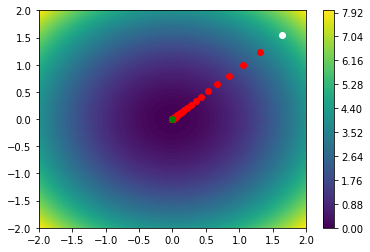

Solucion:  [5.753087968015112e-49, 5.4485315060659864e-49] 6.278451674031393e-97


In [16]:
print("Punto Inicial: ", f , df)
resolucion = 100
rango= 2
X= np.linspace(-rango,rango,resolucion)
Y= np.linspace(-rango,rango,resolucion)
Z= np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])
#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

P=[random.uniform(-2,2 ),random.uniform(-2,2 ) ]
plt.plot(P[0],P[1],"o",c="white")
#Tasa de aprendizaje
TA=.1

#Iteraciones
for _ in range(500):
  grad = df(P)
  #print(grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion: ", P , f(P))

In [17]:
#Definimos la funcion
#sin(1/2 * x^2- 1/4 * y^2 + 3) * cos(2*x +1 - E^y)
f = lambda X: np.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) * np.cos(2 * X[0] + 1 - np.e**X[1])

Punto Inicial:  <function <lambda> at 0x7f951e838d90> <function <lambda> at 0x7f951e5bf1e0>


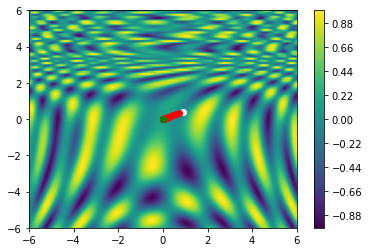

Solucion:  [3.132711196442091e-49, 1.4564934508889388e-49] 0.1411200080598672


In [18]:
print("Punto Inicial: ", f , df)
resolucion = 100
rango= 6
X= np.linspace(-rango,rango,resolucion)
Y= np.linspace(-rango,rango,resolucion)
Z= np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])
#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

P=[random.uniform(-3,3 ),random.uniform(-3,3 ) ]
plt.plot(P[0],P[1],"o",c="white")
#Tasa de aprendizaje
TA=.1

#Iteraciones
for _ in range(500):
  grad = df(P)
  #print(grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion: ", P , f(P))

In [19]:
def df(PUNTO):
  h = 0.01
  T = np.copy(PUNTO)
  grad = np.zeros(2)
  for it, th in enumerate(PUNTO):
    T[it] = T[it] + h
    grad[it] = (f(T) - f(PUNTO)) / h
  return grad

print(df(grad))

[-0.0077713 -0.0031734]
